# BUSINESS PROBLEM

**No-Churn Telecom is an establish Telecom operation in Europe with more than a decade in Business. Due to new players in the Market, telecom industry has become very competitive and retaining customers becoming challenge. 
In spite of No-Churn initiative for reducing tariffs and promoting more offers, the churn rate (percentage of customers migrating to competitors) is well above 10%. 
No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry

# GOAL

1. Understanding the variables that influencing the customers to 
migrate. 
2. Creating Churn risk scores that can be indicative to drive 
retention campaigns. 
3. Introduce new predicting variable “CHURN-FLAG” with values 
YES(1) or NO(0) so that email campaigns with lucrative offers 
can be targets to Churn YES customers. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('telecom_churn_data.csv')

In [4]:
df.head()

,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
0,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
1,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
2,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
3,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
4,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [0]:
df.columns = ['State','Account Length','Area Code','Phone','International Plan','VMail Plan','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls','Churn']

In [6]:
df.head(10)

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
1,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
2,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
3,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
4,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
5,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
6,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
7,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
8,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
9,IN,65,415,329-6603,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
State                   4616 non-null object
Account Length          4616 non-null int64
Area Code               4616 non-null int64
Phone                   4616 non-null object
International Plan      4616 non-null object
VMail Plan              4616 non-null object
VMail Message           4616 non-null int64
Day Mins                4616 non-null float64
Day Calls               4616 non-null int64
Day Charge              4616 non-null float64
Eve Mins                4616 non-null float64
Eve Calls               4616 non-null int64
Eve Charge              4616 non-null float64
Night Mins              4616 non-null float64
Night Calls             4616 non-null int64
Night Charge            4616 non-null float64
International Mins      4616 non-null float64
International calls     4616 non-null int64
International Charge    4616 non-null float64
CustServ Calls          4616 non-null

In [0]:
df.drop(df[['Account Length','Phone']],axis = 1,inplace=True)

In [9]:
df.head()

,State,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
1,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
2,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
3,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
4,AL,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


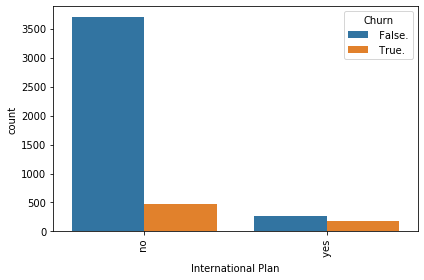

In [10]:
sns.countplot('International Plan',hue='Churn',data=df)
plt.xticks(rotation=90)
plt.tight_layout()

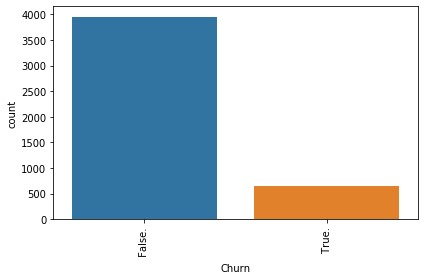

In [11]:
sns.countplot('Churn',data=df)
plt.xticks(rotation=90)
plt.tight_layout()

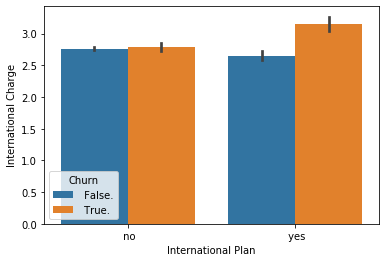

In [12]:
sns.barplot('International Plan','International Charge',hue = 'Churn',data = df)

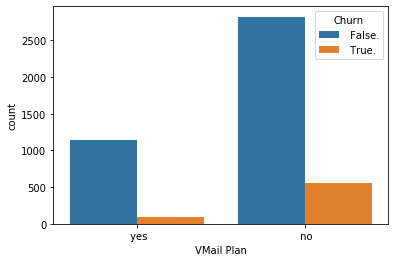

In [13]:
sns.countplot(x = 'VMail Plan',hue = 'Churn',data = df)

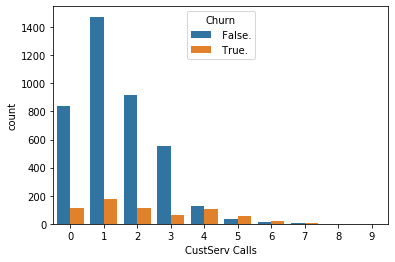

In [14]:
sns.countplot('CustServ Calls',hue = 'Churn',data = df)

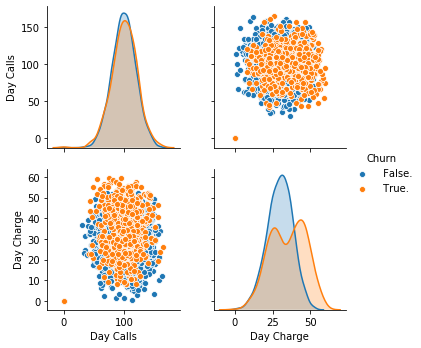

In [15]:
sns.pairplot(df[['Day Calls','Day Charge','Churn']],hue = 'Churn')

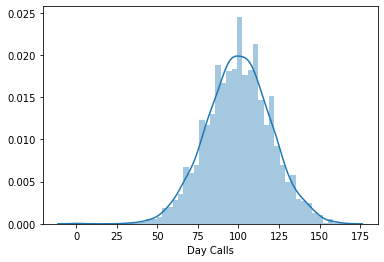

In [16]:
sns.distplot(df['Day Calls'],bins = 50)

In [0]:
df['Churn']=df['Churn'].str.replace('False','0').str.replace('True','1')
df['Churn']=pd.to_numeric(df['Churn'])

In [18]:
df.head()

,State,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0
1,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
2,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
3,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0
4,AL,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0.0


In [0]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['State','International Plan','VMail Plan','Area Code']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [0]:
from sklearn.preprocessing import StandardScaler
sc  =StandardScaler()

In [0]:
x = df.drop(['State','International Plan','VMail Plan','Area Code','Churn'],axis=1)

In [0]:
x = sc.fit_transform(x)

In [0]:
x = pd.DataFrame(x,columns=['VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls'])

In [24]:
x.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls
0,1.335823,-0.348881,1.154171,-0.349162,-0.097509,0.142270,-0.096981,1.064230,0.153198,1.065050,1.240552,-0.583572,1.241325,-0.433941
1,-0.577351,1.166800,0.701511,1.166964,-1.567138,0.495425,-1.567661,-0.752172,0.203362,-0.750893,0.696553,0.230255,0.690555,-1.199057
2,-0.577351,2.204429,-1.461196,2.204600,-2.740072,-0.614492,-2.740482,-0.073495,-0.549098,-0.073761,-1.334377,1.044083,-1.337891,0.331174
3,-0.577351,-0.254383,0.651216,-0.254336,-1.031109,1.100834,-1.030118,-0.271360,1.056150,-0.271624,-0.065046,-0.583572,-0.061716,1.096290
4,-0.577351,0.796218,-0.103217,0.796379,0.398961,0.041368,0.398676,0.065011,0.905658,0.066941,-1.443176,0.637169,-1.445359,-1.199057


In [0]:
for i in var_mod:
    x[i] = df[i]
    

In [26]:
x.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,State,International Plan,VMail Plan,Area Code
0,1.335823,-0.348881,1.154171,-0.349162,-0.097509,0.142270,-0.096981,1.064230,0.153198,1.065050,1.240552,-0.583572,1.241325,-0.433941,35,0,1,1
1,-0.577351,1.166800,0.701511,1.166964,-1.567138,0.495425,-1.567661,-0.752172,0.203362,-0.750893,0.696553,0.230255,0.690555,-1.199057,31,0,0,1
2,-0.577351,2.204429,-1.461196,2.204600,-2.740072,-0.614492,-2.740482,-0.073495,-0.549098,-0.073761,-1.334377,1.044083,-1.337891,0.331174,35,1,0,0
3,-0.577351,-0.254383,0.651216,-0.254336,-1.031109,1.100834,-1.030118,-0.271360,1.056150,-0.271624,-0.065046,-0.583572,-0.061716,1.096290,36,1,0,1
4,-0.577351,0.796218,-0.103217,0.796379,0.398961,0.041368,0.398676,0.065011,0.905658,0.066941,-1.443176,0.637169,-1.445359,-1.199057,1,1,0,2


In [0]:
y = df['Churn']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 200)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
error_rate = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

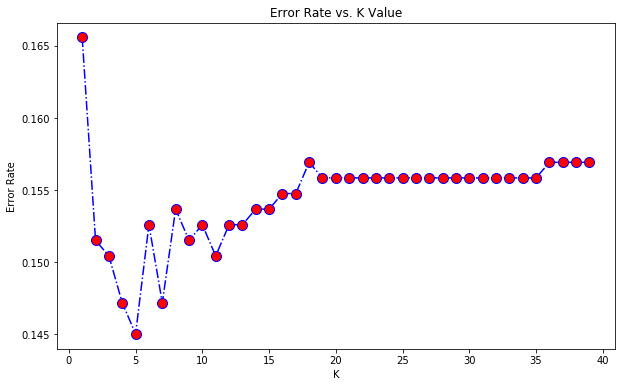

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashdot', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pre = knn.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [37]:
print(confusion_matrix(y_test,pre))

[[778   1]
 [133  12]]


In [38]:
print(accuracy_score(y_test,pre))

0.854978354978355


let's check with Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=100)

Text(0.5, 0, 'Relative importance')

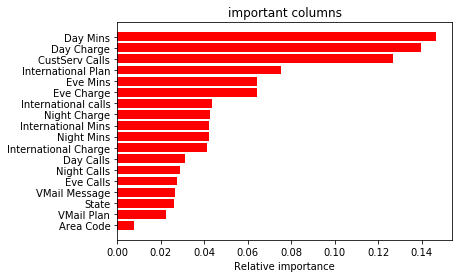

In [41]:
rfc.fit(x_train,y_train)
feature = x.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(3)
plt.title('important columns')
plt.barh(range(len(indices)),importances[indices],color = 'r',align = 'center')
plt.yticks(range(len(indices)),feature[indices])
plt.xlabel('Relative importance')

In [0]:
pre = rfc.predict(x_test)

In [43]:
print(confusion_matrix(y_test,pre))
print(accuracy_score(y_test,pre))

[[777   2]
 [ 35 110]]
0.95995670995671


With XGboost

In [0]:
from xgboost import XGBClassifier

In [0]:
xg = XGBClassifier()

In [50]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pre = xg.predict(x_test)

In [52]:
print(accuracy_score(pre,y_test))

0.9502164502164502
